# Notebook 2

## Derivadas (Parte 1)

#### Python üêç

> Dr. Ricardo M√©ndez Fragoso $\mathbb{R} i \vec c \hbar$

Comenzaremos con hacer algunas gr√°ficas de funciones conocidas. En este caso vamos como generar las gr√°ficas de $\sin (x)$ y $\cos (x)$ utilizando la biblioteca de **pylab**, y para ello utilizamos la siguiente instrucci√≥n:

In [1]:
from pylab import *

Esta biblioteca activa la utilizaci√≥n de muchas funciones entre las que se encuentran **numpy** y **matplotlib**. De esta manera podemos generar el dominio de la variable $x\in[0,2\pi]$ como un arreglo lineal de datos y obtener su *seno* y *coseno*:

In [2]:
x = linspace(0,2*pi)
y = sin(x)
Dy = cos(x)

Con estos datos podemos hacer las gr√°ficas de las funciones anteriores con los siguientes comandos:

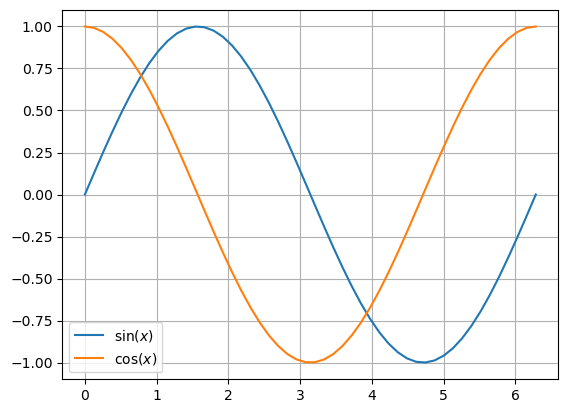

In [3]:
figure(dpi=100)
plot(x,y,label="$\sin(x)$") # graficar seno
plot(x,Dy,label="$\cos(x)$") # graficar coseno
legend(),grid() # Agregar leyenda y reticula de fondo
show() # mostrar la grafica

Veamos como obtener la derivada de la funci√≥n $\sin (x)$. Para ello vamos a realizar comparaciones con la derivada anal√≠tica, que en este caso es $\cos (x)$ y que guardamos en la variable ```Dy```. Para ello podemos utilizar la aproximaci√≥n lineal de una funci√≥n alrededor del punto $x_i$:

$$
f(x_i + h) \sim f(x_i) + f'(x_i)h
$$

donde se han eliminado los t√©rminos de orden superior en $h^2$ y la derivada se calcula en el punto $x_i$. Si el paso entre cada punto de la malla donde se calculan los puntos de la funci√≥n es $h = x_{i+1} - x_i$ se obtiene que derivada en el punto $x_i$ se puede escribir como:

$$
f'(x_i) \sim \frac{f(x_{i+1}) - f(x_{i})}{x_{i+1} - x_{i}}
$$

Note que el √∫ltimo punto del arreglo se tiene que calcular de manera diferente y que veremos despu√©s. Por esta raz√≥n en el siguiente ejemplo no se calcula la derivada en el √∫ltimo punto.

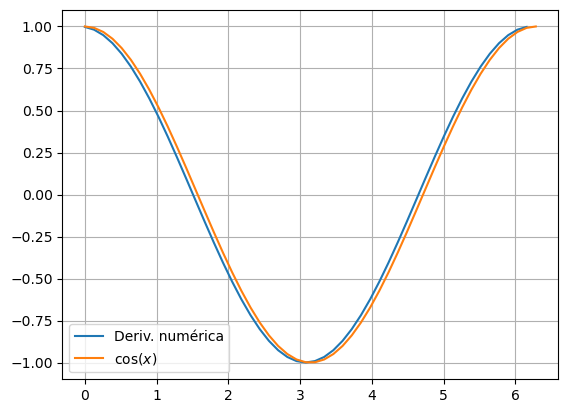

In [4]:
x_d = zeros(len(x)-1) 
y_d = zeros(len(y)-1)
for i in range(len(y)-1):
    m = (y[i+1] - y[i])/(x[i+1] - x[i])
    x_d[i] , y_d[i] = x[i] , m
figure(dpi=100)
plot(x_d,y_d,label="Deriv. num√©rica")
plot(x,Dy,label="$\cos(x)$")
grid(),legend()
show()

Una mejor aproximaci√≥n a la derivada en el punto $x_i$ es utilizando los puntos vecinos de la malla en dicho punto. De acuerdo con las notas de la [p√°gina del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/), la derivada en ese punto se puede calcular de la siguiente manera:

$$f'(x_i) \sim \frac{f(x_{i+1}) - f(x_{i-1})}{ x_{i+1} - x_{i-1} } $$

Es decir:

$$f'_i \sim\frac{f_{i+1} - f_{i-1}}{ x_{i+1} - x_{i-1} } $$

N√≥tese que en este caso se tienen que excluir el punto inicial y el punto final. La ventaja de esta forma de hacer los c√°lculos es que si la malla es uniforme, la precisi√≥n es mejor debido a que los t√©rminos en $(x_{i+1} - x_{i})^3$ se han despreciado. Para comparar ambos formas de hacer el c√°lculo, a continuaci√≥n se expone el c√°lculo de la derivada con ambos m√©todos.

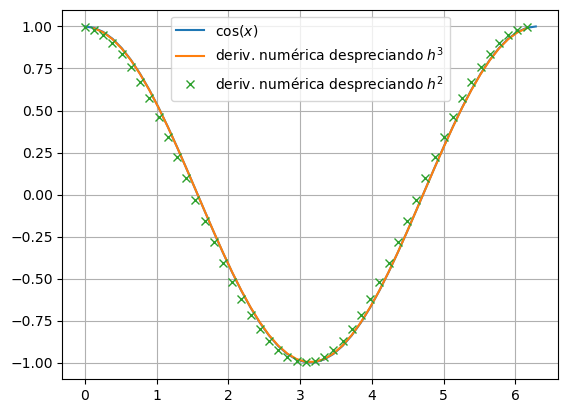

In [5]:
x_prima = zeros(len(x)-2)
y_prima = zeros(len(y)-2)
for i in range(1,len(y)-1):
    m = (y[i+1] - y[i-1])/(x[i+1] - x[i-1])
    x_prima[i-1]= x[i] # Buzo caperuzo, el indice i empieza en 1
    y_prima[i-1] = m
figure(dpi=100)
plot(x,Dy,label="$\cos(x)$")
plot(x_prima,y_prima,label="deriv. num√©rica despreciando $h^3$")
plot(x_d,y_d,'x',label=u"deriv. num√©rica despreciando $h^2$")
grid(),legend()
show()

Como se puede observar el √∫ltimo algoritmo tiene mucho mejor precisi√≥n. Es por ello que tanto la derivada de la funci√≥n $\sin ' (x)=\cos(x)$ y su derivada num√©rica se ven pr√°cticamente empalmadas. De hecho, podemos calcular el error relativo entre la derivada anal√≠tica, $\cos(x)$, y la num√©rica. Para lo anterior, a continuaci√≥n mostramos los errores entre la soluci√≥n anal√≠tica y la num√©rica para cada aproximaci√≥n.

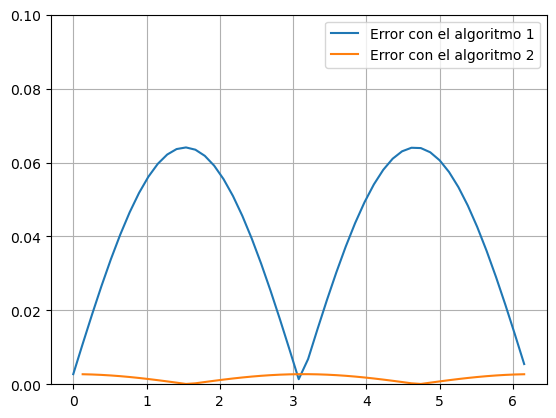

In [6]:
error_1 = abs( Dy[0:(len(Dy)-1)] - y_d )
error_2 = abs( Dy[1:(len(Dy)-1)] - y_prima )
figure(dpi=100)
plot(x_d,error_1,label='Error con el algoritmo 1')
plot(x_prima,error_2,label='Error con el algoritmo 2')
ylim([0,0.1])
legend(),grid()
show()

[Regresar a la p√°gina del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versi√≥n durante el a√±o 2022. Versi√≥n interactiva en Colab.
+ PE 112919 durante el a√±o 2020. Idea original.